In [1]:
from sequenzo import *
import pandas as pd

## 

In [2]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建前缀树
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [3]:
print('india_tree:', india_tree)
print('us_tree:', us_tree)

india_tree: PrefixTree(max_depth=10, total_prefixes=5804)
us_tree: PrefixTree(max_depth=10, total_prefixes=5517)


In [4]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [5]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)

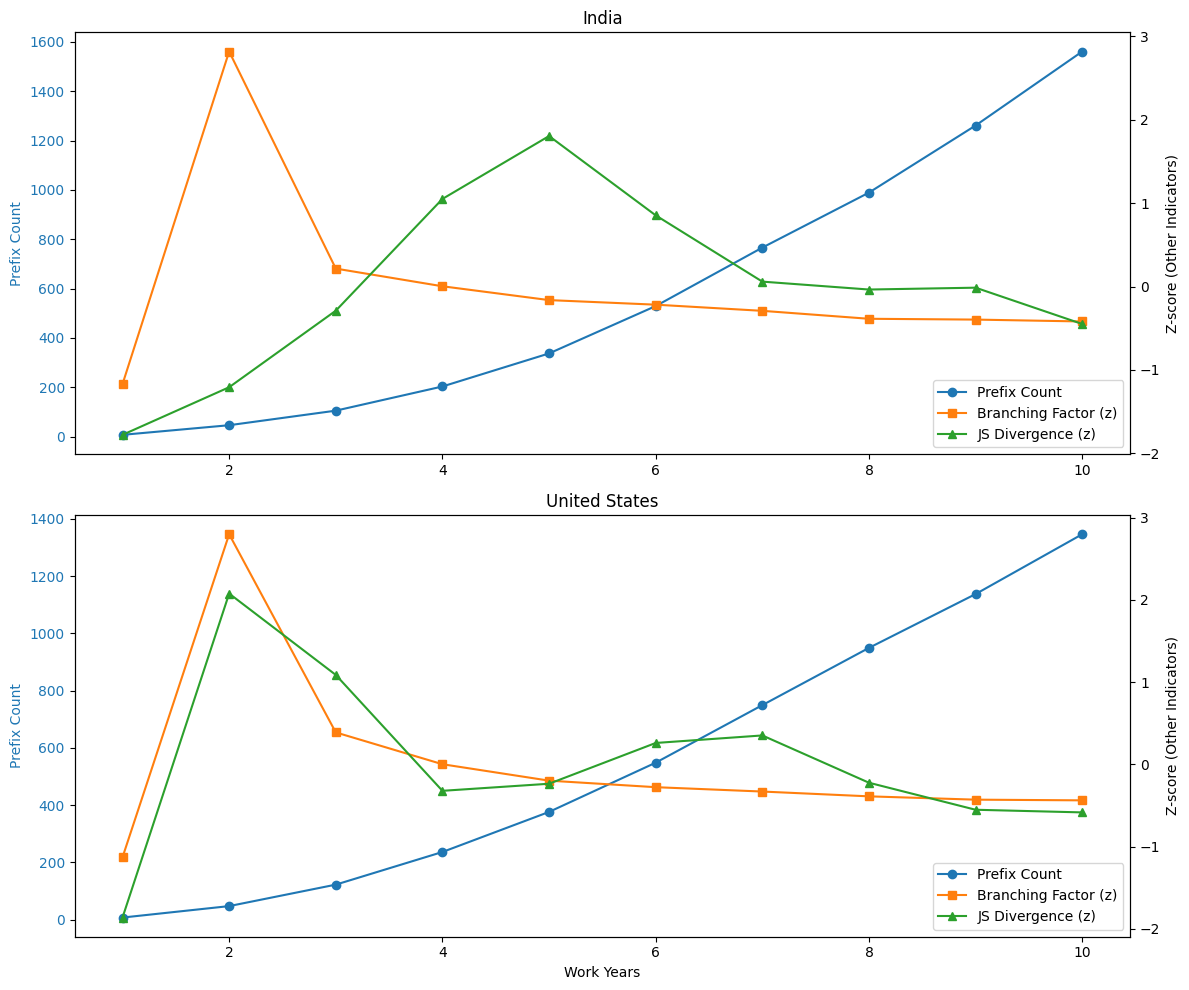

✅ 已生成带有自定义标题的对比图


<Figure size 640x480 with 0 Axes>

In [6]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 准备两组数据
custom_groups_data = {
    "IND": {
        "prefix_counts": india_prefix_counts,
        "branching_factors": india_branching_factors,
        "js_scores": india_js_scores
    },
    "USA": {
        "prefix_counts": us_prefix_counts,
        "branching_factors": us_branching_factors,
        "js_scores": us_js_scores
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="prefix_system_indicators_comparison"
)

print("✅ 已生成带有自定义标题的对比图")


In [6]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["diverged"] = india_model.compute_diverged()
india_df["first_divergence_year"] = india_model.compute_first_divergence_year()
india_df["prefix_rarity_score"] = india_model.compute_prefix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["diverged"] = us_model.compute_diverged()
us_df["first_divergence_year"] = us_model.compute_first_divergence_year()
us_df["prefix_rarity_score"] = us_model.compute_prefix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

In [7]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,3.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


In [9]:
df.to_csv("df_individual_level_indicators.csv", index=False)

First divergence Year 柱状图对比

first_divergence_year 是一个事件变量，只在 diverged == 1 的个体上有意义，因此在 diverged == 0 的行中为 NaN 是完全合理的。

为了避免图像误导或报错，我们在可视化时应该：

* 仅绘制非 NaN 的 divergence_year

* 并区分国家以便对比

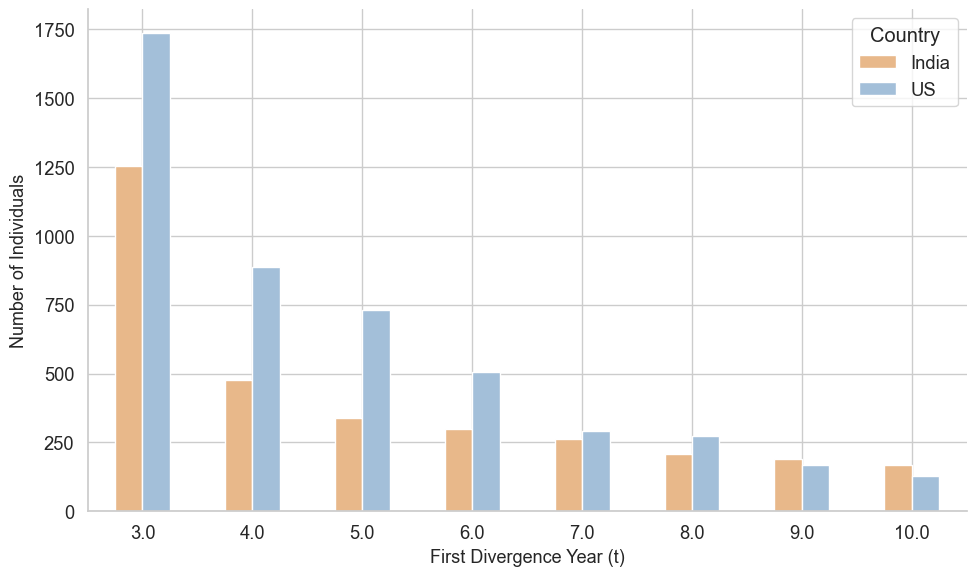

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 只保留 diverged 个体
diverged_df = df[df["diverged"] == 1].copy()

# 分国家计数
vc_divergence = diverged_df.groupby("country")["first_divergence_year"].value_counts().unstack().fillna(0).T

# 重命名列为想要的图例标签
vc_divergence = vc_divergence.rename(columns={"india": "India", "us": "US"})

# 设置画布
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

india_color = "#E8B88A"
us_color = "#A3BFD9"

# 绘图（堆叠或并排任选），莫奈柔色调
vc_divergence.plot(
    kind="bar",
    ax=ax,
    color=[india_color, us_color]  # Monet-style: India / US
    # color=["#A6C1A9", "#C6A5CF"], # 薰衣草搭配颜色
)

# 设置标题与标签
# ax.set_title("Divergence Year Distribution by Country", fontsize=16)
ax.set_xlabel("First Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.savefig("First Divergence Year Distribution by Country", 
            dpi=300, 
            bbox_inches='tight')
plt.show()

Prefix Rarity Score 分布 KDE 对比

先对 prefix rarity score 做 z-score 标准化，然后在图中画出 z = 1.5 对应的位置（即：标准化后的值为 1.5 的位置，在原始数据中的对应值）。

步骤逻辑：
1. 计算每组 prefix rarity score 的整体均值与标准差；
2. 使用这些参数把整个数据 z-score 标准化；
3. 计算 z = 1.5 对应的原始值；
4. 在原图中加一条竖线显示这个阈值位置。

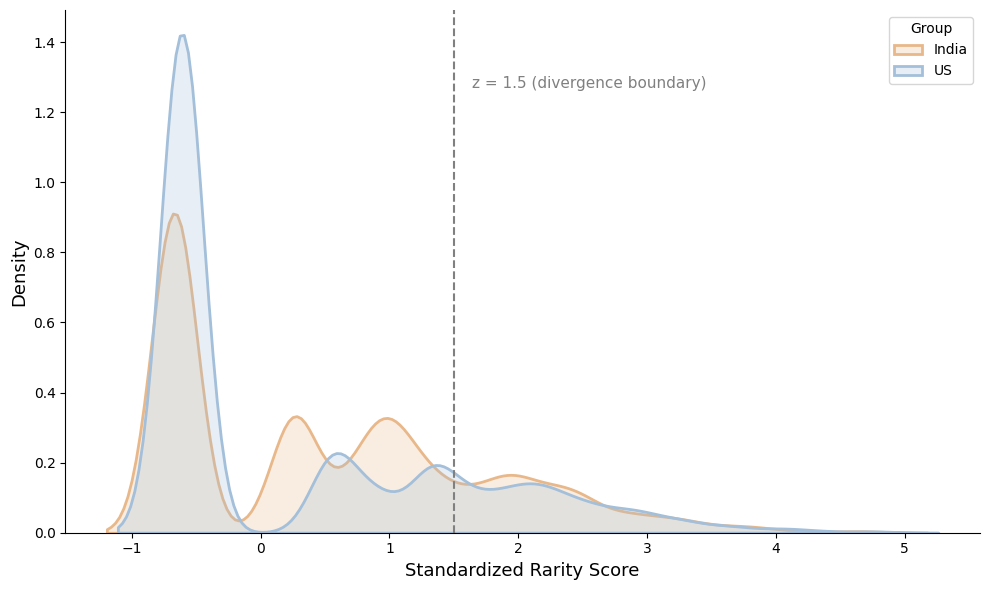

{'mean': 0.382861116184238,
 'std': 1.2310435862142342,
 'threshold_value': 1.5,
 'z_threshold': 1.5,
 'is_standardized_score': True}

In [8]:
from sequenzo import IndividualDivergence, plot_prefix_rarity_distribution
import numpy as np

# 1) 分组各自建模（组内做列向 z 标准化）
indiv_india = india_model
indiv_us    = us_model

india_stat = indiv_india.compute_standardized_rarity_score(min_t=3, window=1)
us_stat    = indiv_us.compute_standardized_rarity_score(min_t=3, window=1)

# 可自检：判定与统计量一致
flags_india = indiv_india.compute_diverged(z_threshold=1.5, min_t=3, window=1)
flags_us    = indiv_us.compute_diverged(z_threshold=1.5, min_t=3, window=1)
assert ((np.array(india_stat) >= 1.5) == np.array(flags_india)).all()
assert ((np.array(us_stat)    >= 1.5) == np.array(flags_us)).all()

# 2) 画图：竖线就是决策边界
# 绘制分布图，竖线现在真正代表分类边界
plot_prefix_rarity_distribution(
    data={"India": india_stat, "US": us_stat},
    is_standardized_score=True,  # 关键参数！
    z_threshold=1.5,
    threshold_label="z = 1.5 (divergence boundary)",
    save_as="standardized_rarity_comparison"
)


In [ ]:
import pandas as pd

# 已有：
# df_rarity_india = india_model.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
# df_rarity_us    = us_model.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)

# 若你有对应的 worker_id 列表（顺序与 model.sequences 完全对齐）：
# 例如若你当时用 df_india_seq（含 worker_id，行顺序与 sequences 一致）建立了 india_model：
# 注意：这个df是最开始引入的df，没有经过任何数据处理的df
df_india = df[df['country'] == 'india']
df_us = df[df['country'] == 'us']

worker_ids_india = df_india["worker_id"].tolist()
worker_ids_us    = df_us["worker_id"].tolist() 

# 校验长度
assert len(worker_ids_india) == df_rarity_india.shape[0], \
    f"India length mismatch: ids={len(worker_ids_india)} rarity={df_rarity_india.shape[0]}"

assert len(worker_ids_us) == df_rarity_us.shape[0], \
    f"US length mismatch: ids={len(worker_ids_us)} rarity={df_rarity_us.shape[0]}"

def wide_to_long_rarity(df_rarity_wide: pd.DataFrame, worker_ids, country_name: str) -> pd.DataFrame:
    out = df_rarity_wide.copy()
    out["worker_id"] = worker_ids
    out["country"] = country_name
    long_df = out.melt(
        id_vars=["worker_id", "country"],
        var_name="year",
        value_name="rarity_score"
    )
    # t1 -> 1, t2 -> 2, ...
    long_df["year"] = long_df["year"].str.replace("t", "", regex=False).astype(int)
    return long_df

df_long_india = wide_to_long_rarity(df_rarity_india, worker_ids_india, "India")
df_long_us    = wide_to_long_rarity(df_rarity_us,    worker_ids_us,    "US")

# 合并两个国家
df_rarity_long = pd.concat([df_long_india, df_long_us], ignore_index=True)

# 可选：排序、重置索引
df_rarity_long = df_rarity_long.sort_values(["country", "worker_id", "year"]).reset_index(drop=True)

df_rarity_long
# df_rarity_long 就是你要的长表：
# 列为：worker_id, country, year, rarity_score

,worker_id,country,year,rarity_score
0,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,1,0.499509
1,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,2,0.517442
2,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,3,0.557534
3,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,4,0.622334
4,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,5,0.693213
...,...,...,...,...
389015,zwheeler,US,6,0.470416
389016,zwheeler,US,7,0.486217
389017,zwheeler,US,8,0.499013
389018,zwheeler,US,9,0.511134


示例2：不显示阈值线


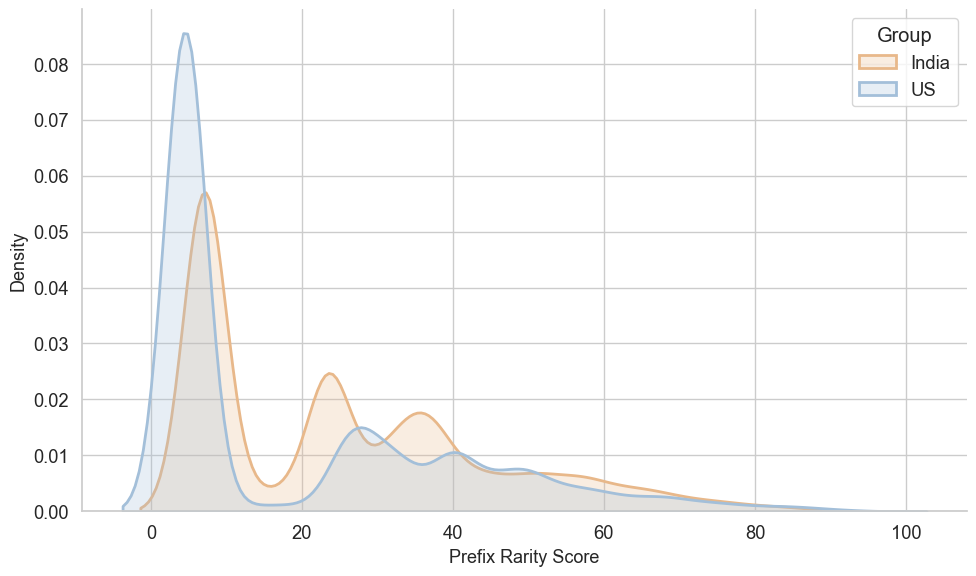


示例3：单组分析（仅印度）


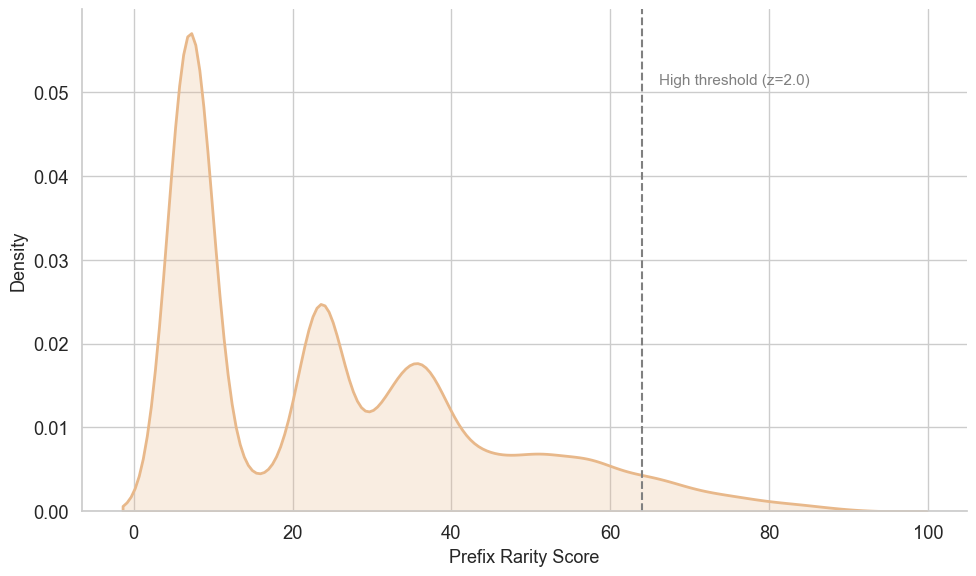


示例4：演示三组对比的可能性


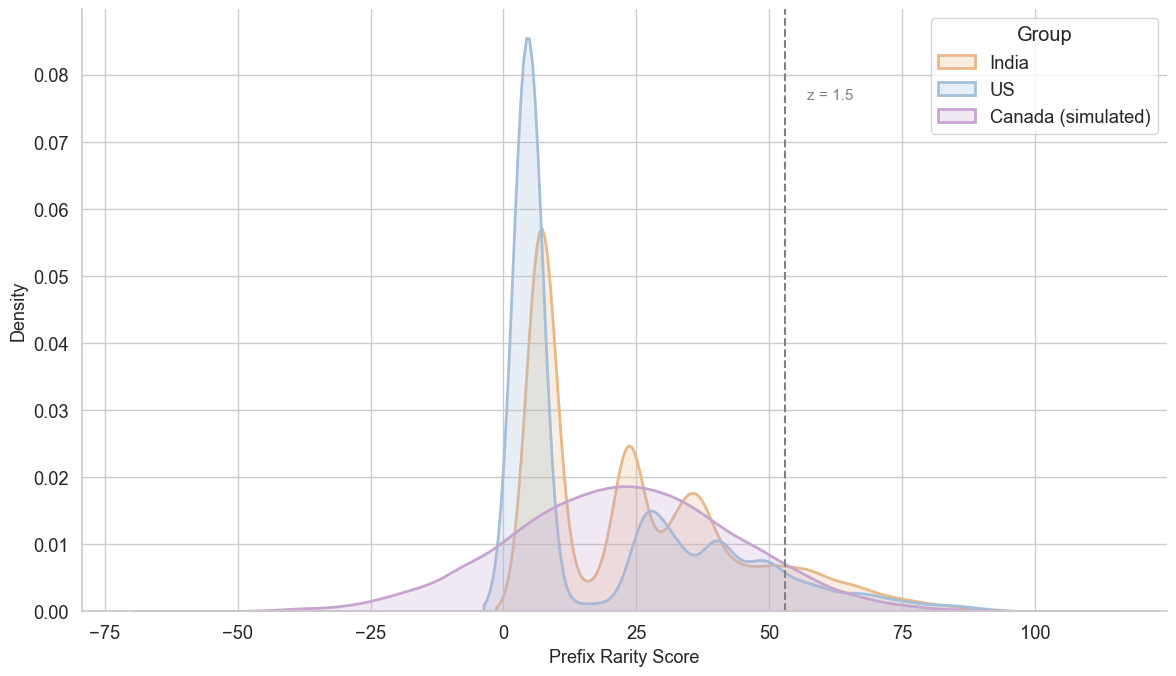

✅ 所有示例完成！


In [11]:
# 示例2：无阈值线，简洁对比
print("示例2：不显示阈值线")
plot_prefix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=False,  # 关闭阈值线
    # save_as="rarity_distribution_clean"
)

# 示例3：单组分析
print("\n示例3：单组分析（仅印度）")
plot_prefix_rarity_distribution(
    data=india_df["prefix_rarity_score"].tolist(),
    group_names=["India"],
    colors=["#E8B88A"],
    show_threshold=True,
    z_threshold=2.0,  # 不同的阈值
    threshold_label="High threshold (z=2.0)",  # 自定义标签
    # save_as="india_only_analysis"
)

# 示例4：三组对比（如果有第三个国家的数据）
print("\n示例4：演示三组对比的可能性")
# 这里用模拟数据演示
import numpy as np
np.random.seed(42)
simulated_canada = np.random.normal(
    loc=np.mean(india_df["prefix_rarity_score"]) * 0.9, 
    scale=np.std(india_df["prefix_rarity_score"]) * 1.1, 
    size=len(india_df)
)

three_groups = {
    "India": india_df["prefix_rarity_score"].tolist(),
    "US": us_df["prefix_rarity_score"].tolist(),
    "Canada (simulated)": simulated_canada.tolist()
}

plot_prefix_rarity_distribution(
    data=three_groups,
    show_threshold=True,
    z_threshold=1.5,
    figsize=(12, 7),  # 稍大的图
    # save_as="three_countries_comparison"
)

print("✅ 所有示例完成！")


Path Uniqueness 箱线图 + Strip（展示极端个体）

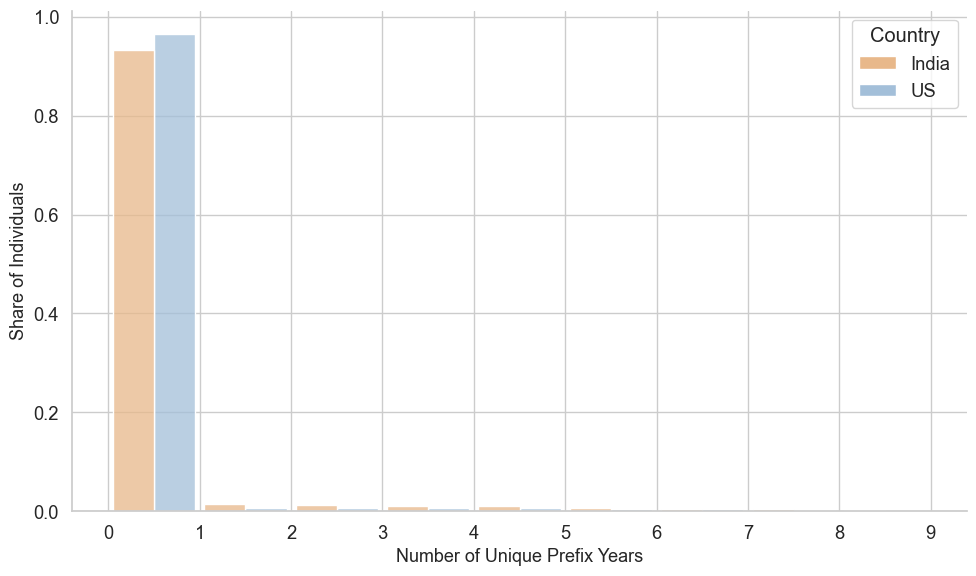

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格与字体比例（和前图一致）
sns.set(style="whitegrid", font_scale=1.2)

# 设置颜色（莫奈柔色调）
india_color = "#E8B88A"
us_color = "#A3BFD9"
palette = {"India": india_color, "US": us_color}

# 确保国家字段是大写标签（与图例一致）
df["country"] = df["country"].str.strip().str.title().replace({"Us": "US", "India": "India"})

# 创建画布
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=df,
    x="path_uniqueness",
    hue="country",
    multiple="dodge",
    binwidth=1,
    shrink=0.9,
    palette=palette,
    stat="probability",    # 👈 显示 share 而不是 density
    common_norm=False,     # 👈 每组单独归一化
    ax=ax
)

# 手动修复 legend
from matplotlib.patches import Patch

custom_legend = [
    Patch(facecolor="#E8B88A", label="India"),
    Patch(facecolor="#A3BFD9", label="US")
]
ax.legend(handles=custom_legend, title="Country")

# 设置标签与样式
ax.set_xlabel("Number of Unique Prefix Years", fontsize=13)
ax.set_ylabel("Share of Individuals", fontsize=13)
# ax.set_title("Distribution of Path Uniqueness by Country", fontsize=15)
ax.set_xticks(range(0, df["path_uniqueness"].max() + 1))
# plt.legend(title="Country")
sns.despine()
plt.tight_layout()

# 保存 & 显示
plt.savefig("Path Uniqueness Distribution by Country", dpi=300, bbox_inches='tight')
plt.show()


In [13]:
for country in ['India', 'US']:
    
    country_df = df[df['country']==country]
    
    print(f'{country} - full sample size, {country_df.shape[0]}')
    
    print(country)

    print(country_df['diverged'].value_counts())

India - full sample size, 15113
India
diverged
0    11921
1     3192
Name: count, dtype: int64
US - full sample size, 23789
US
diverged
0    19066
1     4723
Name: count, dtype: int64


示例1：整体相关性分析


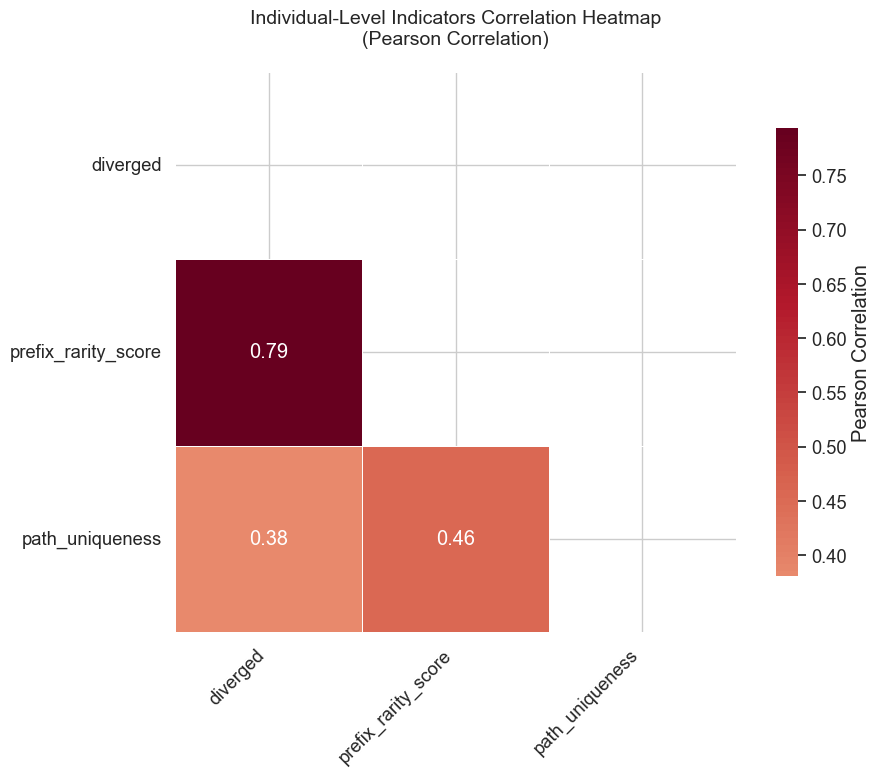

📊 检测到的指标: ['diverged', 'prefix_rarity_score', 'path_uniqueness']
📊 样本大小: 38902


In [14]:
# 🔥 新功能：个体层指标相关性热力图！
# 演示 plot_individual_indicators_correlation 的各种用法

from sequenzo import plot_individual_indicators_correlation

# 示例1：整体相关性热力图（所有个体）
print("示例1：整体相关性分析")
corr_results = plot_individual_indicators_correlation(
    df,
    save_as="overall_indicators_correlation"
)

print("📊 检测到的指标:", corr_results['summary']['indicators_included'])
print("📊 样本大小:", corr_results['summary']['sample_size'])



示例2：按国家分组的相关性分析


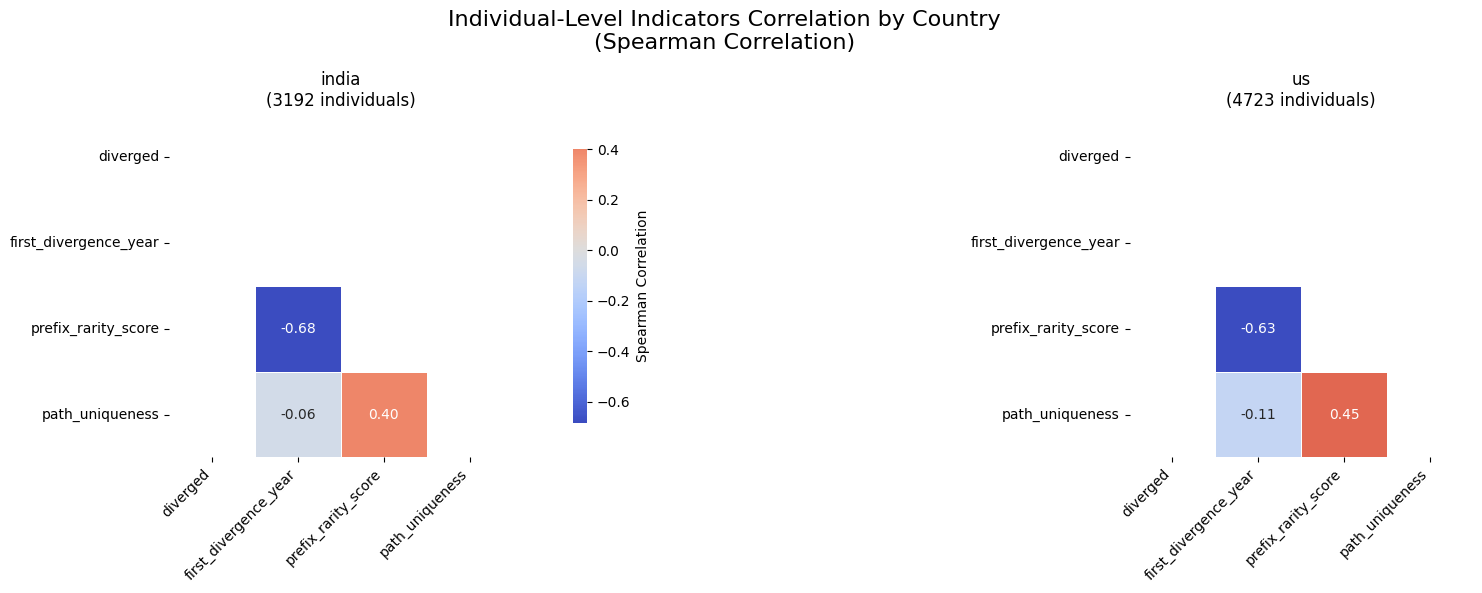

📊 各国样本大小: {'india': 3192, 'us': 4723}


In [10]:
# 示例2：按国家分组的相关性对比（最重要的用法！）
print("\n示例2：按国家分组的相关性分析")
country_corr_results = plot_individual_indicators_correlation(
    df,
    indicator_columns=['diverged', 'first_divergence_year', 'prefix_rarity_score', 'path_uniqueness'],
    group_column='country',  # 按国家分组
    correlation_method='spearman',  # 使用Spearman相关系数（对非正态分布更鲁棒）
    cmap='coolwarm',  # 使用冷暖配色
    figsize=(12, 6),  # 更宽的图像以容纳两个子图
    save_as="country_indicators_correlation"
)

print("📊 各国样本大小:", country_corr_results['summary']['sample_size'])

# # 示例3：自定义指标选择
# print("\n示例3：只分析核心指标")
# core_indicators = ['diverged', 'first_divergence_year', 'prefix_rarity_score', 'path_uniqueness']
# core_corr_results = plot_individual_indicators_correlation(
#     df,
#     indicator_columns=core_indicators,
#     group_column='country',
#     cmap='viridis',  # 使用科学配色
#     annot=True,
#     fmt='.3f',  # 显示3位小数
#     save_as="core_indicators_correlation"
# )

# # 示例4：高端美学版本（学术发表级别）
# print("\n示例4：学术发表级别的美观热力图")
# academic_corr = plot_individual_indicators_correlation(
#     df,
#     indicator_columns=core_indicators,
#     correlation_method='pearson',
#     cmap='RdBu_r',  # 经典的红蓝配色
#     center=0,  # 以0为中心
#     annot=True,
#     fmt='.2f',
#     figsize=(8, 6),
#     save_as="academic_correlation_heatmap"
# )

# print("✅ 所有相关性分析完成！")


从这个图看，确实信息量不多：

变量很少，而且几乎就是 prefix_rarity_score 和 path_uniqueness 之间有点中等正相关（0.40–0.45），以及 prefix_rarity_score 和 first_divergence_year 有个比较强的负相关（-0.63～-0.68）。

其他格子不是 NaN 就是接近 0，视觉上大片空白，看起来不太“值”一整张热力图。

因此，最后我在文章里面只整了一段话。

In [9]:
df.rename(columns={f"C{i}": str(i) for i in range(1, 11)}, inplace=True)

In [17]:
df

,worker_id,gender,country,cohort,1,2,3,4,5,6,7,8,9,10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,US,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,US,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,US,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,3.0,64.726362,3
38900,nancy-jain-a8723460,female,US,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


In [18]:
df.to_csv('df.csv', index=False)

-------------India-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 15113
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
[>] Labels: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


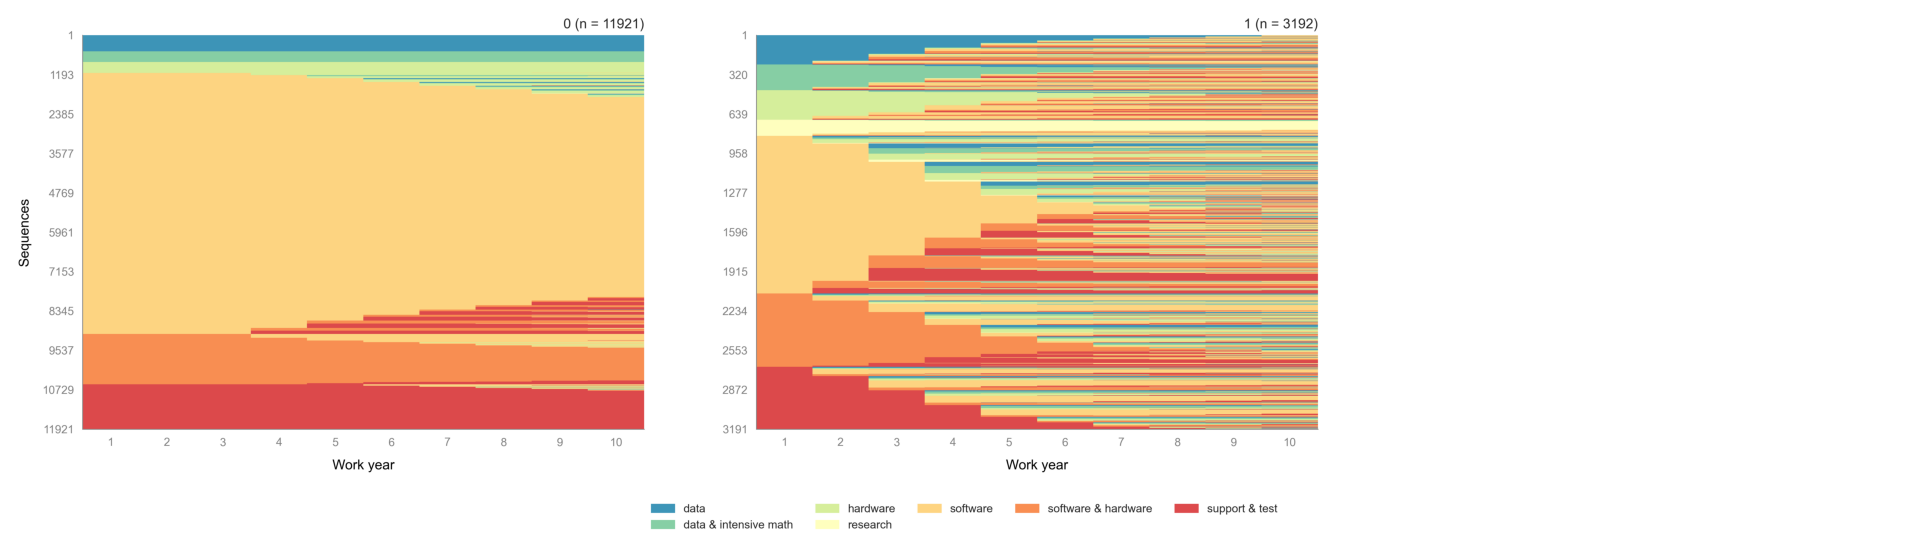

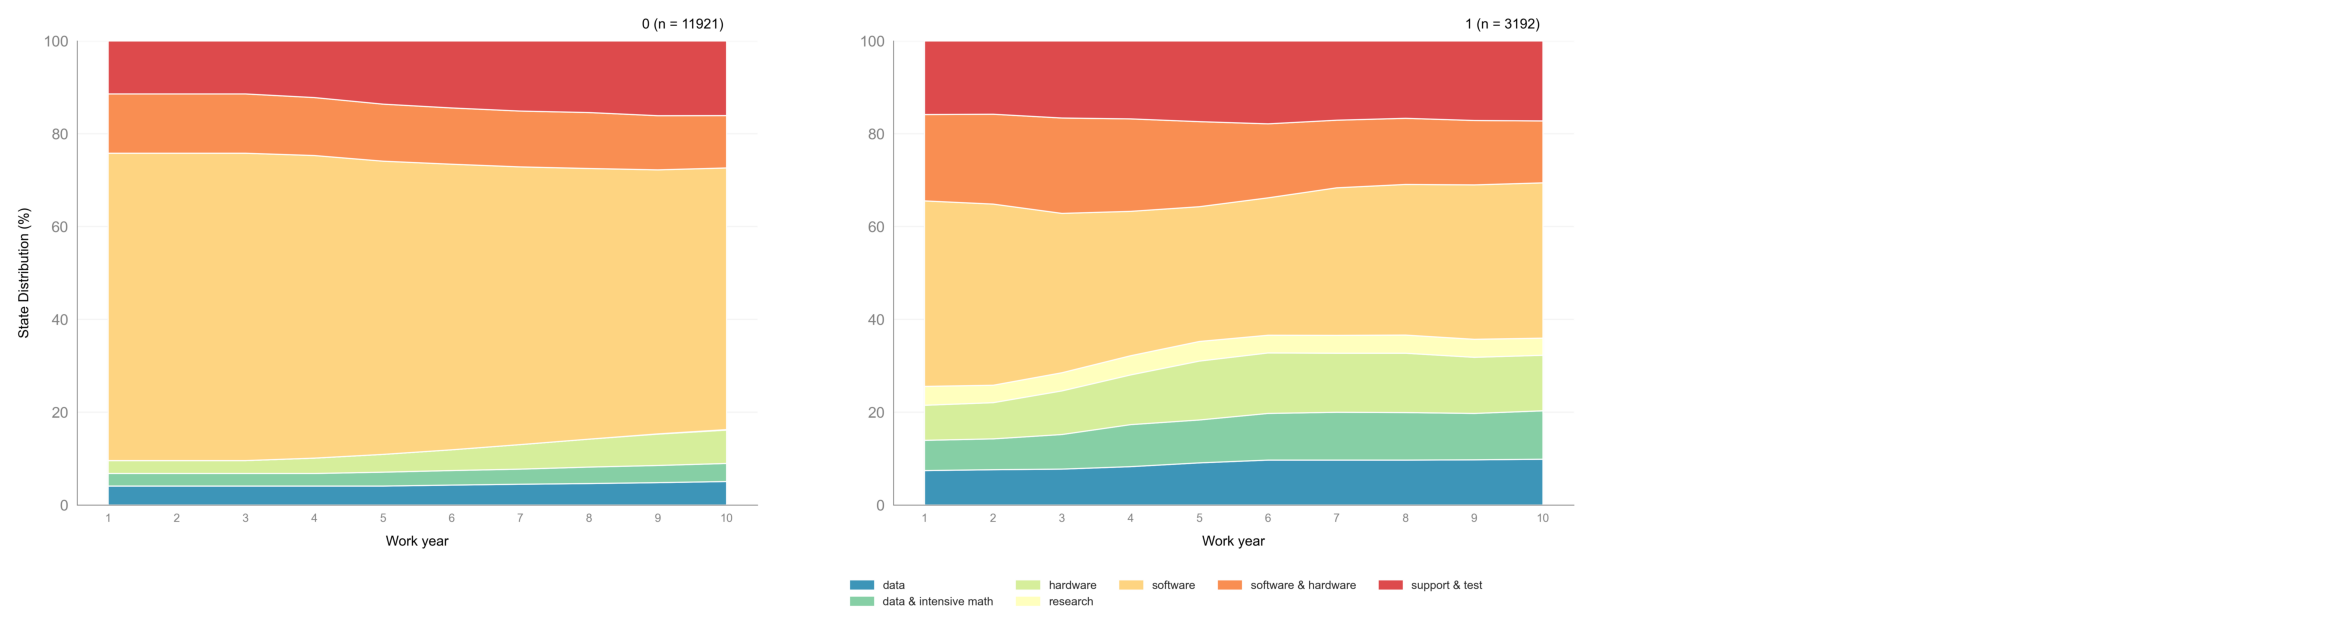

-------------US-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 23789
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
[>] Labels: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


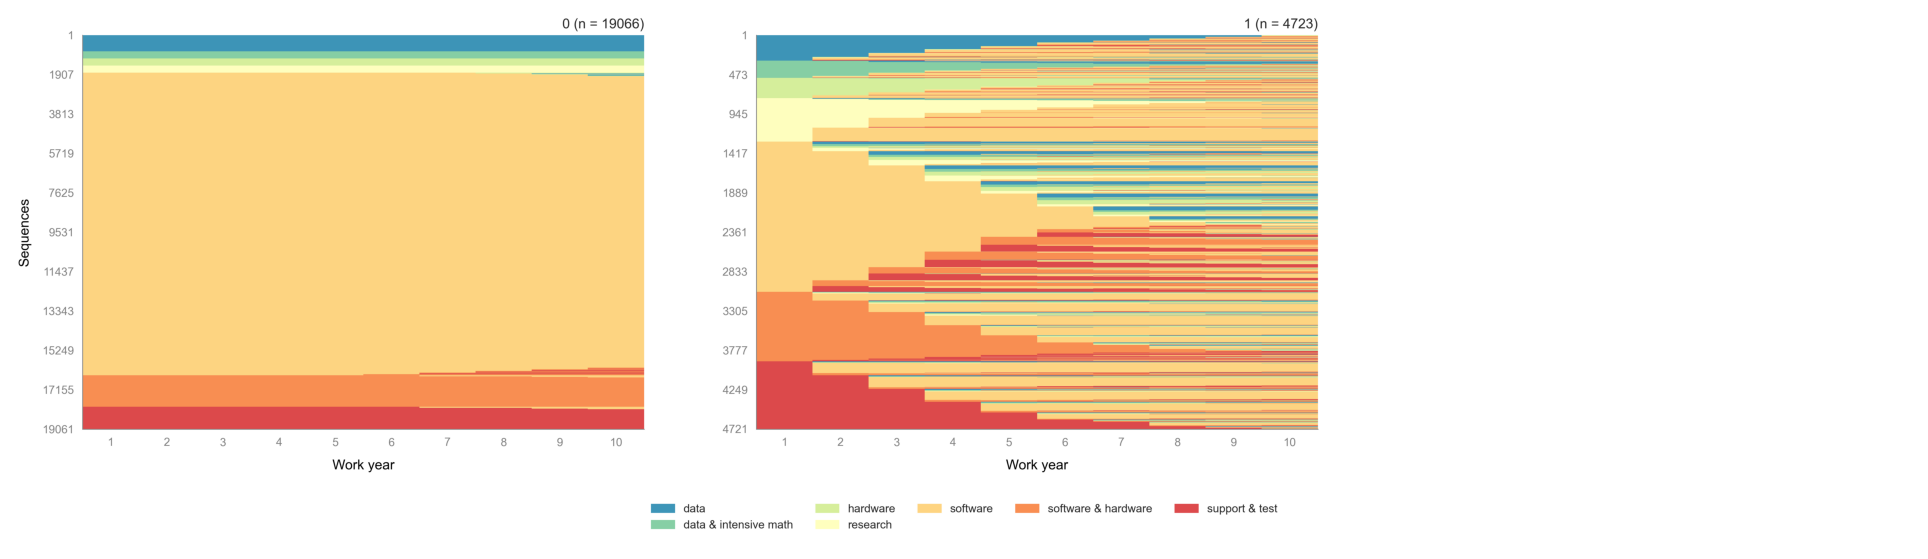

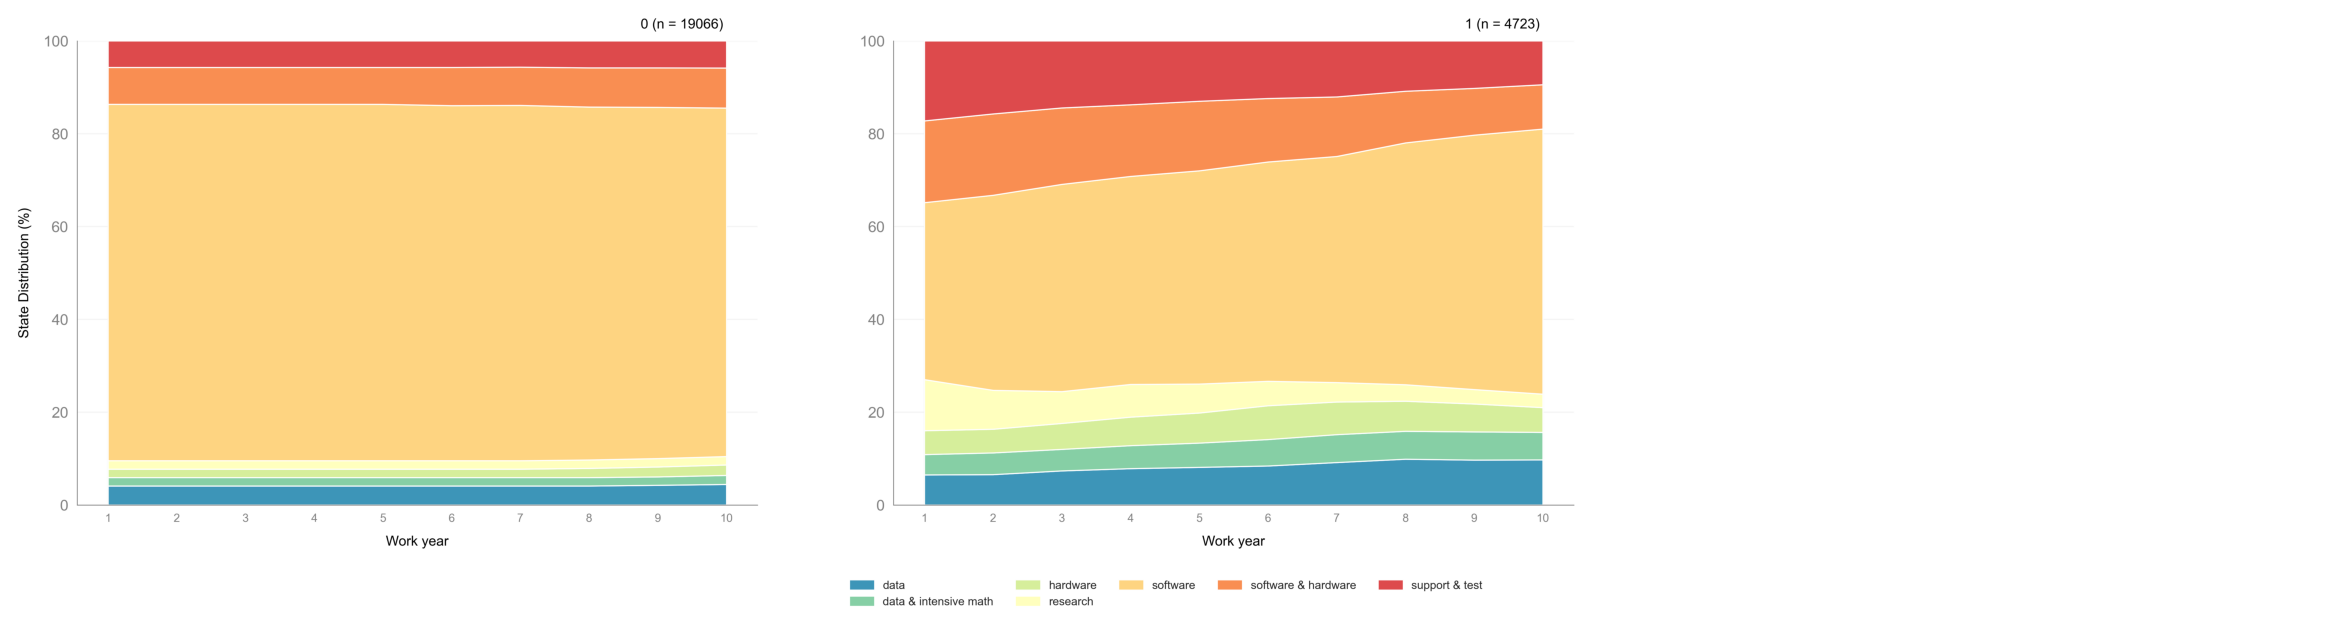

In [19]:
def by_country_plotting_sequences(country_name, country_dataframe):
    from sequenzo import SequenceData
    from sequenzo.visualization import plot_sequence_index
    
    time_cols = [str(i) for i in range(1, 11)]
    state_list = sorted(country_dataframe[time_cols].stack().dropna().unique().tolist())  # e.g. ['data', 'hardware', ...]
    
    seq = SequenceData(
        data=country_dataframe,
        id_col="worker_id",
        time=time_cols,
        states=state_list,
        time_type="year",
    )
    
    plot_sequence_index(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # 可选排序方式
        save_as=f"{country_name}_diverged_vs_mainstream_index_plot.png",
        dpi=300,
        xlabel="Work year"
    )
    
    plot_state_distribution(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # 可选排序方式
        save_as=f"{country_name}_diverged_vs_mainstream_state_distribution_plot.png",
        dpi=300,
        xlabel="Work year"
    )


for country in ['India', 'US']:
    print(f'-------------{country}-------------')
    country_df = df[df['country'] == country]
    by_country_plotting_sequences(country, country_df)
    

In [11]:
import pandas as pd
import statsmodels.formula.api as smf

# 文件路径
df_main = pd.read_csv("df.csv")  # 包含 divergence 指标
controls = pd.read_csv("/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data/df_final_encoded_categorical_levels.csv",
                       index_col=0)

# 清理控制变量
controls = controls.drop(columns=["organization_type", "num_followers", "industry", "company_size"], errors="ignore")

# 合并主表 + 控制变量
df = df_main.merge(controls, on="worker_id", how="inner")

# df
# 清理与转换
# df = df[df["country"].isin(["india", "us"])].copy()
df["gender"] = df["gender"].astype("category")
df["cohort"] = df["cohort"].astype("category")
df["country"] = df["country"].astype("category")

# 教育分类合并
df["highest_educational_degree"] = df["highest_educational_degree"].replace(
    {"PhD": "Advanced Degree", "Master": "Advanced Degree"}
)

df

,worker_id,gender,country,cohort,1,2,3,4,5,6,...,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,highest_seniority_level,work_years,simplified_company_size
0,dilip-kumar-nath-7538746a,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Multinational,Senior,15.250,Large (500+ employees)
1,vinodkumar-yadav-b7a976107,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Local,Normal,11.500,Large (500+ employees)
2,josh-slosson-07a1509,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,International,Normal,18.417,Small (11-50 employees)
3,jonatthan-rodriguez-8a5612121,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Multinational,Senior,11.917,Large (500+ employees)
4,jeenesh-jyothindran-8ba28818,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Multinational,Senior,13.083,Large (500+ employees)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32626,michelle-elder,female,US,21-30 total work years,software,software,software,software,software,software,...,0,NaN,26.687441,0,Bachelor,True,Local,Senior,25.000,Medium (51-500 employees)
32627,nan-jiang-743a9863,female,US,0-10 total work years,software,software,software,software,software,software,...,0,NaN,4.528812,0,Advanced Degree,False,Local,Normal,10.000,Large (500+ employees)
32628,tina-pava-4846207,female,US,21-30 total work years,software,software,software,software,software,software,...,0,NaN,4.528812,0,Bachelor,False,Local,Normal,26.750,Large (500+ employees)
32629,sariandoni,female,US,21-30 total work years,support & test,software,software,software,software,software,...,1,3.0,64.726362,3,Advanced Degree,False,Local,Senior,26.000,Large (500+ employees)


### Seniority levels

In [12]:
df_seniority = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_senority_levels_for_10_years.csv")
df_seniority

,worker_id,gender,country,cohort,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,work_years,company_size,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,Bachelor,False,Multinational,15.250,"1,001-5,000 employees",Regular,Regular,Regular,Regular,Senior,Senior,Senior,Senior,Senior,Senior
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,Bachelor,False,Local,11.500,"5,001-10,000 employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
2,rajani-kulkarni-72674649,female,india,11-20 total work years,Bachelor,False,Multinational,11.250,"10,001+ employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Leader,Leader,Regular
3,josh-slosson-07a1509,male,india,11-20 total work years,Bachelor,False,International,18.417,11-50 employees,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
4,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,Bachelor,False,Multinational,11.917,"5,001-10,000 employees",Regular,Regular,Senior,Senior,Senior,Senior,Senior,Senior,Senior,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32623,edwardgu1915,male,us,0-10 total work years,Master,False,Multinational,10.499,"501-1,000 employees",Leader,Leader,Leader,Leader,Leader,Senior,Senior,Senior,Regular,Senior
32624,terry-ferguson-8060363a,male,us,21-30 total work years,Bachelor,False,Local,21.001,"10,001+ employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
32625,christy-garner-677894213,female,us,21-30 total work years,Bachelor,False,Multinational,27.250,"501-1,000 employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
32626,jay-p-119369202,male,us,21-30 total work years,Bachelor,False,Local,23.417,"10,001+ employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular


计算每年 prefix rarity

如果某些年几乎所有人相同（方差接近 0），z 分数会是 NaN；这种情况下原始尺度的 rarity 更稳健。


In [13]:
# 返回 DataFrame，列名 t1..t10；zscore=True 则按年做列内标准化
df_rarity_india = india_model.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
df_rarity_us = us_model.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
# 若需要 z 分数版本：
# df_rarity_z = div.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=True)

In [14]:
df_rarity_india

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,0.499509,0.517442,0.557534,0.622334,0.693213,0.750123,0.795696,0.837312,0.881535,0.915332
1,0.499509,0.517442,0.557534,0.622334,0.693213,0.750123,0.795696,0.837312,0.881535,0.915332
2,0.499509,0.517442,0.557534,0.622334,0.693213,0.750123,0.795696,0.837312,0.881535,0.915332
3,0.499509,0.517442,0.557534,0.622334,0.693213,0.750123,0.795696,0.837312,0.881535,0.915332
4,0.499509,0.517442,0.557534,0.622334,0.693213,0.750123,0.795696,0.837312,0.881535,0.915332
...,...,...,...,...,...,...,...,...,...,...
15108,0.499509,0.517442,0.557534,0.622334,0.693213,0.750123,0.795696,0.837312,0.881535,0.915332
15109,3.272425,3.341044,3.412710,5.959749,6.012393,6.126803,8.524698,8.524698,9.623309,9.623309
15110,0.499509,0.517442,0.557534,0.622334,0.693213,0.750123,0.795696,0.837312,0.881535,0.915332
15111,2.091222,2.133340,2.199742,2.273437,2.337119,2.397102,2.451654,2.493212,2.519989,2.559407


In [15]:
df_rarity_us

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,0.369263,0.384644,0.405297,0.429287,0.450563,0.470416,0.486217,0.499013,0.511134,0.522978
1,0.369263,0.384644,0.405297,0.429287,0.450563,0.470416,0.486217,0.499013,0.511134,0.522978
2,2.316085,2.367670,2.439262,2.529477,2.609036,2.667842,2.723256,2.757114,2.791472,6.898925
3,0.369263,0.384644,0.405297,0.429287,0.450563,0.470416,0.486217,0.499013,0.511134,0.522978
4,0.369263,0.384644,0.405297,0.429287,0.450563,0.470416,0.486217,0.499013,0.511134,0.522978
...,...,...,...,...,...,...,...,...,...,...
23784,0.369263,0.384644,0.405297,0.429287,0.450563,0.470416,0.486217,0.499013,0.511134,0.522978
23785,0.369263,0.384644,0.405297,0.429287,0.450563,0.470416,0.486217,0.499013,0.511134,0.522978
23786,2.525266,5.272958,5.289487,5.332046,5.340780,5.367448,5.367448,10.076976,10.076976,10.076976
23787,0.369263,0.384644,0.405297,0.429287,0.450563,6.145153,8.467540,8.467540,8.690684,8.690684


In [33]:
import pandas as pd

# 已有：
# df_rarity_india = india_model.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
# df_rarity_us    = us_model.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)

# 若你有对应的 worker_id 列表（顺序与 model.sequences 完全对齐）：
# 例如若你当时用 df_india_seq（含 worker_id，行顺序与 sequences 一致）建立了 india_model：
# 注意：这个df是最开始引入的df，没有经过任何数据处理的df
df_india = df[df['country'] == 'india']
df_us = df[df['country'] == 'us']

worker_ids_india = df_india["worker_id"].tolist()
worker_ids_us    = df_us["worker_id"].tolist() 

# 校验长度
assert len(worker_ids_india) == df_rarity_india.shape[0], \
    f"India length mismatch: ids={len(worker_ids_india)} rarity={df_rarity_india.shape[0]}"

assert len(worker_ids_us) == df_rarity_us.shape[0], \
    f"US length mismatch: ids={len(worker_ids_us)} rarity={df_rarity_us.shape[0]}"

def wide_to_long_rarity(df_rarity_wide: pd.DataFrame, worker_ids, country_name: str) -> pd.DataFrame:
    out = df_rarity_wide.copy()
    out["worker_id"] = worker_ids
    out["country"] = country_name
    long_df = out.melt(
        id_vars=["worker_id", "country"],
        var_name="year",
        value_name="rarity_score"
    )
    # t1 -> 1, t2 -> 2, ...
    long_df["year"] = long_df["year"].str.replace("t", "", regex=False).astype(int)
    return long_df

df_long_india = wide_to_long_rarity(df_rarity_india, worker_ids_india, "India")
df_long_us    = wide_to_long_rarity(df_rarity_us,    worker_ids_us,    "US")

# 合并两个国家
df_rarity_long = pd.concat([df_long_india, df_long_us], ignore_index=True)

# 可选：排序、重置索引
df_rarity_long = df_rarity_long.sort_values(["country", "worker_id", "year"]).reset_index(drop=True)

df_rarity_long
# df_rarity_long 就是你要的长表：
# 列为：worker_id, country, year, rarity_score

,worker_id,country,year,rarity_score
0,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,1,0.499509
1,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,2,0.517442
2,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,3,0.557534
3,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,4,0.622334
4,%7E%7E%7Eabhishek%7E%7E%7E-lifoline-4ba22719,India,5,0.693213
...,...,...,...,...
389015,zwheeler,US,6,0.470416
389016,zwheeler,US,7,0.486217
389017,zwheeler,US,8,0.499013
389018,zwheeler,US,9,0.511134


### Fixed effects model

构建面板数据并合并控制变量与因变量

如果 df_seniority 是宽表（Y1..Y10），先把 df_rarity 和 df_seniority 都转成长表，再与控制变量按人和年合并。

In [20]:
import pandas as pd

# 宽转长：rarity
df_rarity_long = df_rarity_india.melt(id_vars="worker_id", var_name="year", value_name="rarity")
df_rarity_long["t"] = df_rarity_long["year"].str.replace("t", "", regex=False).astype(int)

# 因变量：df_seniority，列为 Y1..Y10，带 id
df_y = df_seniority.copy()
df_y_long = df_y.melt(id_vars="id", var_name="Y_col", value_name="Y")
df_y_long["t"] = df_y_long["Y_col"].str.replace("Y", "", regex=False).astype(int)

# 控制变量：若为静态（不随年变），直接按 id 合并；若为随年变化，需也为长表带 t
# 假设 ctrl_df_long 含列：id, t, ctrl1, ctrl2, ...
panel = (
    df_y_long.merge(df_rarity_long[["id", "t", "rarity"]], on=["id", "t"], how="left")
              .merge(ctrl_df_long, on=["id", "t"], how="left")
)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['worker_id']"

运行固定效应模型

Python 里可用 linearmodels 的 PanelOLS；或在 statsmodels 里用实体/时间哑变量（或 within transform）。下面示例用 linearmodels。

In [ ]:
# pip install linearmodels
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# 设定 MultiIndex (id, t)
panel = panel.set_index(["id", "t"]).sort_index()

# 自变量矩阵（含 rarity + 控制变量）
X = panel[["rarity", "ctrl1", "ctrl2", "ctrl3"]]  # 替换成你的控制变量名
X = sm.add_constant(X)  # 是否加常数项视模型设定而定；FE 通常不需要常数（会被吸收）

# 固定效应：entity 固定效应 + time 固定效应（可选）
mod = PanelOLS(panel["Y"], X, entity_effects=True, time_effects=True)
res = mod.fit(cov_type="clustered", cluster_entity=True)

print(res.summary)

结果与稳健性

你可以尝试：
1. 用 z-score 的 rarity（逐年标准化）替换原始稀有度。
2. 只用个体固定效应或只用时间固定效应做对比。
3. 使用不同的控制变量集，检验稳健性。